# Restaurant Food Cost Prediction

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [5]:
import os
os.chdir("C:/Users/Sristi/Documents/R/data")
os.getcwd()

'C:\\Users\\Sristi\\Documents\\R\\data'

In [6]:
df_train = pd.read_csv('food_cost_train.csv', encoding='ISO-8859–1')
df_train

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am  4pm, 7:30pm  11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm  11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am  3:30pm, 7pm  11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am  1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am  1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300
...,...,...,...,...,...,...,...,...,...
12685,QUICK BITES,13228,"North Indian, Burger, Kebab","12noon  12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,Gachibowli,3.8,546 votes,500
12686,"CASUAL DINING,BAR",9686,"Goan, Continental","12noon  1am (Mon-Fri),11am  5pm, 7pm  1am...",Mumbai,Bandra Kurla Complex,4.3,1214 votes,1800
12687,LOUNGE,11133,"Finger Food, Continental, Asian, Chinese",12noon  12:30AM (Mon-Sun),Navi Mumbai,Vashi,4.0,608 votes,1300
12688,CASUAL DINING,6134,"North Indian, South Indian, Chinese, Street Food",6am  10:45pm (Mon-Sun),Chennai,Maduravoyal,3.5,32 votes,400


In [7]:
df_test = pd.read_csv('food_cost_test.csv', encoding='ISO-8859–1')
df_test

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon  12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am  12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am  11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am  10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am  10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes
...,...,...,...,...,...,...,...,...
4226,CASUAL DINING,9057,"North Indian, Mughlai, Chinese",11:30am  11:30pm (Mon-Sun),New Delhi,Punjabi Bagh,3.9,287 votes
4227,None,1247,"Biryani, North Indian, Sandwich, Salad, Wraps",11am  1am (Mon-Sun),Bangalore,HSR Layout,4.3,469 votes
4228,QUICK BITES,8617,"Continental, North Indian",9:30am  10:30pm (Mon-Sun),Faridabad,Sector 86,3.7,53 votes
4229,QUICK BITES,6485,"Rolls, Beverages","11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",Kochi,Kochi,-,NaN


In [8]:
#Combining train and test datasets
df_food_cost=df_train.append(df_test, 'sort=True')
df_food_cost

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,Thane,1200.0,"Malwani, Goan, North Indian",Dombivali East,3.6,9438,"11am  4pm, 7:30pm  11:30pm (Mon-Sun)",CASUAL DINING,49 votes
1,Chennai,1500.0,"Asian, Modern Indian, Japanese",Ramapuram,4.2,13198,6pm  11pm (Mon-Sun),"CASUAL DINING,BAR",30 votes
2,Chennai,800.0,"North Indian, Chinese, Biryani, Hyderabadi",Saligramam,3.8,10915,"11am  3:30pm, 7pm  11pm (Mon-Sun)",CASUAL DINING,221 votes
3,Mumbai,800.0,"Tibetan, Chinese",Bandra West,4.1,6346,11:30am  1am (Mon-Sun),QUICK BITES,24 votes
4,Mumbai,300.0,Desserts,Lower Parel,3.8,15387,11am  1am (Mon-Sun),DESSERT PARLOR,165 votes
...,...,...,...,...,...,...,...,...,...
16916,New Delhi,NaN,"North Indian, Mughlai, Chinese",Punjabi Bagh,3.9,9057,11:30am  11:30pm (Mon-Sun),CASUAL DINING,287 votes
16917,Bangalore,NaN,"Biryani, North Indian, Sandwich, Salad, Wraps",HSR Layout,4.3,1247,11am  1am (Mon-Sun),None,469 votes
16918,Faridabad,NaN,"Continental, North Indian",Sector 86,3.7,8617,9:30am  10:30pm (Mon-Sun),QUICK BITES,53 votes
16919,Kochi,NaN,"Rolls, Beverages",Kochi,-,6485,"11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,NaN


In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
list1=['CITY','VOTES','CUISINES']
for val in list1:
    df_food_cost[val]=le.fit_transform(df_food_cost[val].astype(str))

In [11]:
 df_food_cost

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TIME,TITLE,VOTES
0,400,1200.0,3294,Dombivali East,3.6,9438,"11am  4pm, 7:30pm  11:30pm (Mon-Sun)",CASUAL DINING,1470
1,75,1500.0,364,Ramapuram,4.2,13198,6pm  11pm (Mon-Sun),"CASUAL DINING,BAR",1105
2,75,800.0,3729,Saligramam,3.8,10915,"11am  3:30pm, 7pm  11pm (Mon-Sun)",CASUAL DINING,822
3,277,800.0,5156,Bandra West,4.1,6346,11:30am  1am (Mon-Sun),QUICK BITES,908
4,277,300.0,2218,Lower Parel,3.8,15387,11am  1am (Mon-Sun),DESSERT PARLOR,535
...,...,...,...,...,...,...,...,...,...
16916,316,NaN,4259,Punjabi Bagh,3.9,9057,11:30am  11:30pm (Mon-Sun),CASUAL DINING,1060
16917,42,NaN,785,HSR Layout,4.3,1247,11am  1am (Mon-Sun),None,1436
16918,128,NaN,2089,Sector 86,3.7,8617,9:30am  10:30pm (Mon-Sun),QUICK BITES,1526
16919,216,NaN,4580,Kochi,-,6485,"11am  11:30pm (Mon, Tue, Wed, Thu, Sat, Sun),...",QUICK BITES,2075


In [12]:
#Check for null values
df_food_cost.isnull().sum()

CITY                0
COST             4231
CUISINES            0
LOCALITY          128
RATING              4
RESTAURANT_ID       0
TIME                0
TITLE               0
VOTES               0
dtype: int64

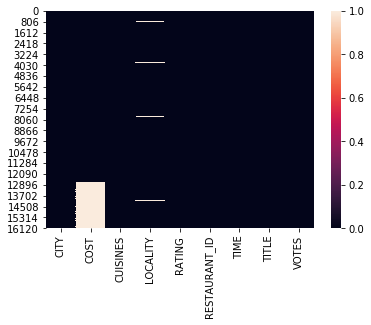

In [13]:
#check for null values again
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(df_food_cost.isnull())
plt.show()

In [14]:
#Removing null values from dataset
df_food_cost.replace(np.NaN, 0, inplace=True)

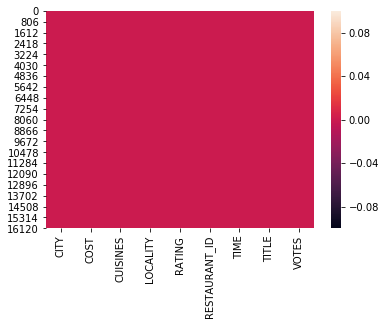

In [15]:
#check for null values again
sns.heatmap(df_food_cost.isnull())
plt.show()

In [16]:
df_food_cost.columns

Index(['CITY', 'COST', 'CUISINES', 'LOCALITY', 'RATING', 'RESTAURANT_ID',
       'TIME', 'TITLE', 'VOTES'],
      dtype='object')

In [20]:
list1=['RATING','LOCALITY']
for val in list1:
    df_food_cost[val]=le.fit_transform(df_food_cost[val].astype(str))

In [21]:
list1=['TITLE']
for val in list1:
    df_food_cost[val]=le.fit_transform(df_food_cost[val].astype(str))

In [23]:
df_food_cost=df_food_cost.drop(['TIME'],axis=1)

In [24]:
df_food_cost.skew()

CITY             0.285912
COST             0.446039
CUISINES        -0.229200
LOCALITY         0.352755
RATING           0.325773
RESTAURANT_ID    0.006775
TITLE           -0.061023
VOTES           -0.270851
dtype: float64

In [25]:
#Treating skewed values
import numpy as np
for col in df_food_cost.columns:
    if df_food_cost.skew().loc[col]>0.55:
        df_food_cost[col]=np.sqrt(df_food_cost[col])

In [26]:
#Z Score to remove outliers
from scipy.stats import zscore
z_score=abs(zscore(df_food_cost))
print(df_food_cost.shape)
df_food_cost_final=df_food_cost.loc[(z_score<3).all(axis=1)]
print(df_food_cost_final.shape)

(16921, 8)
(16680, 8)


In [27]:
import numpy as np
df_x=df_food_cost_final.drop(columns=["COST"])
y=df_food_cost_final[["COST"]]

In [28]:
df_food_cost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16921 entries, 0 to 16920
Data columns (total 8 columns):
CITY             16921 non-null int32
COST             16921 non-null float64
CUISINES         16921 non-null int32
LOCALITY         16921 non-null int32
RATING           16921 non-null int32
RESTAURANT_ID    16921 non-null int64
TITLE            16921 non-null int32
VOTES            16921 non-null int32
dtypes: float64(1), int32(6), int64(1)
memory usage: 661.1 KB


In [29]:
df_food_cost.describe()

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TITLE,VOTES
count,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000,16921.000000
mean,178.173808,17.816515,2801.322380,749.956090,13.246144,7767.211631,65.004137,1203.335737
std,109.323333,13.190612,1504.771403,462.585399,6.207017,4493.287626,35.875571,613.729840
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,75.000000,0.000000,1478.000000,382.000000,10.000000,3873.000000,34.000000,715.000000
50%,160.000000,18.708287,3054.000000,667.000000,13.000000,7751.000000,64.000000,1279.000000
75%,277.000000,24.494897,4008.000000,1172.000000,16.000000,11672.000000,104.000000,1714.000000
max,450.000000,118.321596,5182.000000,1636.000000,32.000000,15573.000000,122.000000,2075.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000AF01633A88>,
      dtype=object)

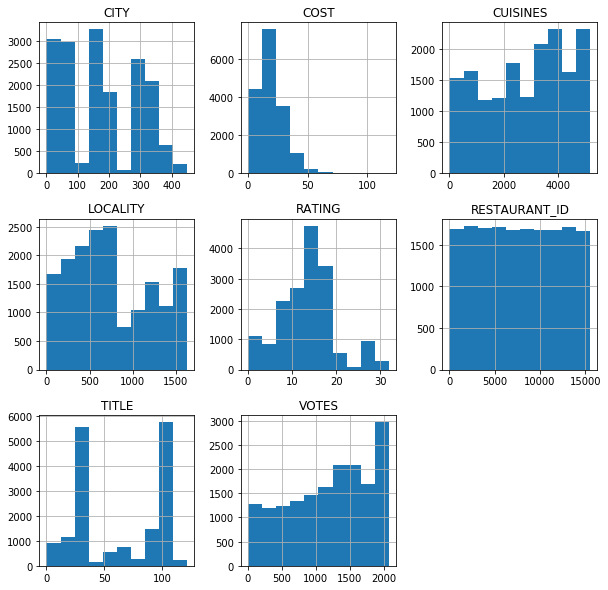

In [30]:
df_food_cost.hist(figsize=(10,10))

In [31]:
#Categorizing RATING into good or bad
bins = (10, 30, 50)
cat_names = ['bad', 'good']
df_food_cost['RATING']=pd.cut(df_food_cost['RATING'], bins = bins, labels = cat_names)

In [32]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [33]:
df_food_cost = df_food_cost.apply(lambda col: le.fit_transform(col.astype(str)), axis=0, result_type='expand')

In [34]:
df_food_cost['RATING'] = le.fit_transform(df_food_cost['RATING'])

In [35]:
df_food_cost['RATING'].value_counts()

0    11246
2     5461
1      214
Name: RATING, dtype: int64

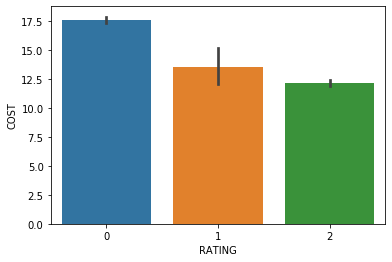

In [53]:
sns.barplot(x='RATING',y='COST',data=df_food_cost)
plt.show()

In [36]:
df_food_cost
#We can do a classification model if we consider RATING as a target.
#But here we have COST as target, so we will do Regression

,CITY,COST,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TITLE,VOTES
0,336,34,2551,893,2,14951,51,525
1,424,41,2935,242,0,3556,53,120
2,424,26,3034,306,0,1020,51,1880
3,198,26,4620,691,0,11516,7,1975
4,198,12,1356,1317,0,5988,74,1561
...,...,...,...,...,...,...,...,...
16916,242,0,3623,208,0,14528,51,70
16917,357,0,4945,1041,0,2747,118,487
16918,33,0,1212,415,0,14039,7,587
16919,131,0,3980,1242,2,11670,7,1197


In [37]:
df_x.shape

(16680, 7)

In [38]:
pd.DataFrame(data=df_x)

,CITY,CUISINES,LOCALITY,RATING,RESTAURANT_ID,TITLE,VOTES
0,400,3294,329,10,9438,34,1470
1,75,364,1215,17,13198,36,1105
2,75,3729,1273,13,10915,34,822
3,277,5156,162,16,6346,104,908
4,277,2218,710,13,15387,55,535
...,...,...,...,...,...,...,...
16916,316,4259,1185,14,9057,34,1060
16917,42,785,462,18,1247,95,1436
16918,128,2089,1371,11,8617,104,1526
16919,216,4580,643,0,6485,104,2075


In [39]:
y.shape

(16680, 1)

In [40]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(df_x)

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr=r2_score(y_test,y_pred)
        print("r2_score corresponding to random state: ",r_state," is: ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
        
    print()
    print()
    print("max r2 score corresponding to ",final_r_state," is ",max_r_score)
    return final_r_state

In [42]:
from sklearn.linear_model import LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2_score corresponding to random state:  42  is:  0.05969942796217986
r2_score corresponding to random state:  43  is:  0.05084256533915932
r2_score corresponding to random state:  44  is:  0.053495061669416644
r2_score corresponding to random state:  45  is:  0.05758276098993276
r2_score corresponding to random state:  46  is:  0.05230547081064452
r2_score corresponding to random state:  47  is:  0.05908442322605978
r2_score corresponding to random state:  48  is:  0.057924870713466525
r2_score corresponding to random state:  49  is:  0.05219301811993282
r2_score corresponding to random state:  50  is:  0.05976289239471344
r2_score corresponding to random state:  51  is:  0.060651547498486114
r2_score corresponding to random state:  52  is:  0.05082857566525523
r2_score corresponding to random state:  53  is:  0.052448364708199025
r2_score corresponding to random state:  54  is:  0.04966529304865763
r2_score corresponding to random state:  55  is:  0.053958817943732806
r2_score corres

In [43]:
from sklearn.model_selection import cross_val_score
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("Standard Deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  -0.30851655741604783
Standard Deviation in r2 score for Linear Regression:  0.27569438796704465


In [44]:
#GridSearch CV for KNeighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr, neighbors, cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 29}

In [45]:
#Calculating r2 score for KNN model based on n_neighbors value
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
knr=KNeighborsRegressor(n_neighbors=29)
r_state=maxr2_score(knr,x,y)

r2_score corresponding to random state:  42  is:  0.07423007099840273
r2_score corresponding to random state:  43  is:  0.06363395580128506
r2_score corresponding to random state:  44  is:  0.06727194413402937
r2_score corresponding to random state:  45  is:  0.06660040254286659
r2_score corresponding to random state:  46  is:  0.05752725598881758
r2_score corresponding to random state:  47  is:  0.060808940800481937
r2_score corresponding to random state:  48  is:  0.05949356638929071
r2_score corresponding to random state:  49  is:  0.0667749820387259
r2_score corresponding to random state:  50  is:  0.07648833267231792
r2_score corresponding to random state:  51  is:  0.0750831801131967
r2_score corresponding to random state:  52  is:  0.05449575677172225
r2_score corresponding to random state:  53  is:  0.0772894990515276
r2_score corresponding to random state:  54  is:  0.06772440005228386
r2_score corresponding to random state:  55  is:  0.07771660783528367
r2_score corresponding

In [46]:
#Calculate mean r2 score and std deviation in r2 score for KNN Regresssion
from sklearn.model_selection import cross_val_score
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNR Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNN Regression:  -0.27595072785349867
standard deviation in r2 score for KNR Regression:  0.25599194527038394


In [47]:
#Lasso Regression
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 0.001}

In [48]:
#Check r2 score for Lasso
lsreg=Lasso(alpha=0.001)
r_state=maxr2_score(lsreg,x,y)

r2_score corresponding to random state:  42  is:  0.05969072904360351
r2_score corresponding to random state:  43  is:  0.050843414874324866
r2_score corresponding to random state:  44  is:  0.053494642362549194
r2_score corresponding to random state:  45  is:  0.05759246999354106
r2_score corresponding to random state:  46  is:  0.05230950452380201
r2_score corresponding to random state:  47  is:  0.059073683062166094
r2_score corresponding to random state:  48  is:  0.0579157534610063
r2_score corresponding to random state:  49  is:  0.052189276955307284
r2_score corresponding to random state:  50  is:  0.05975342199950473
r2_score corresponding to random state:  51  is:  0.06064603231493726
r2_score corresponding to random state:  52  is:  0.05083725122414151
r2_score corresponding to random state:  53  is:  0.05244977673069684
r2_score corresponding to random state:  54  is:  0.04968466055386023
r2_score corresponding to random state:  55  is:  0.05395383213041838
r2_score correspo

In [49]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  -0.3085493305496644
standard deviation in r2 score for Lasso Regression:  0.2757213032272248


In [50]:
#Let's save KNN regression 
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 58, test_size = 0.30)
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)
y_pred=knr.predict(x_test)

In [51]:
#Calculate RMSE and r2 score
import numpy as np
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("RMSE is: ",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is: ",r2_score(y_test,y_pred))

RMSE is:  12.894974149222152
r2_score is:  -0.035901962426364564


In [52]:
#Saving the KNR regression model
from joblib import dump, load
dump(knr, 'Restaurant_Cost.joblib')

['Restaurant_Cost.joblib']